<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/12_3_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

**Data loading**

In [62]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [63]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


**Data cleaning**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [65]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [66]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [67]:
df.drop('society',axis=1,inplace=True)

**EDA**

In [68]:
df['balcony'].dropna(inplace=True)

<Axes: xlabel='balcony', ylabel='count'>

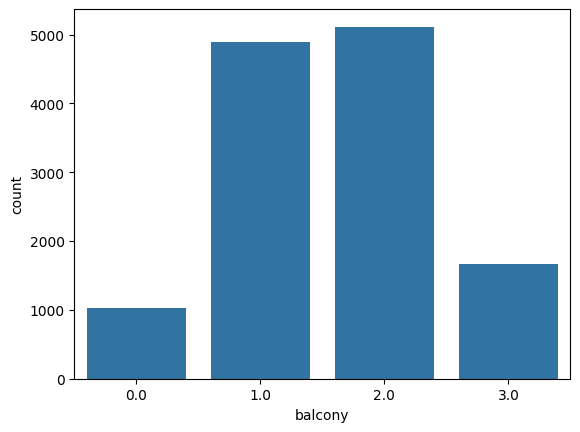

In [69]:
sns.countplot(df,x='balcony')

In [70]:
df.iloc[:,:4].columns

Index(['area_type', 'availability', 'location', 'size'], dtype='object')

In [71]:
for name in df.iloc[:,5:7].columns:
  print(f"{name} : {len(df[name].unique())}")

bath : 20
balcony : 5


<Axes: xlabel='count', ylabel='size'>

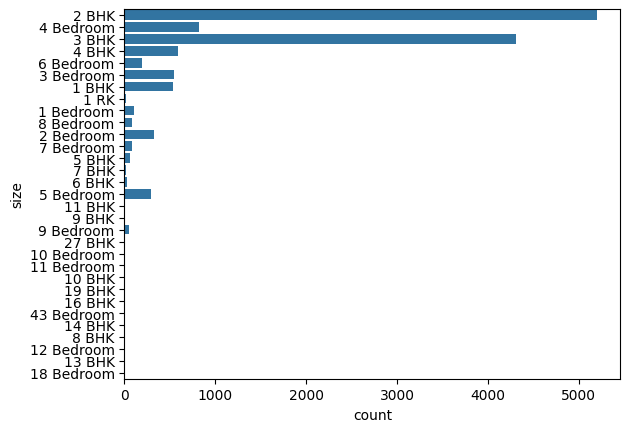

In [72]:
sns.countplot(df['size'])

In [73]:
df['size']=df['size'].apply(lambda x:int(x.split()[0]) if isinstance(x,str) else x)

In [74]:
df['size'].head()

0    2.0
1    4.0
2    3.0
3    3.0
4    2.0
Name: size, dtype: float64

In [75]:
df['size']=df['size'].fillna(2)

<Axes: xlabel='size'>

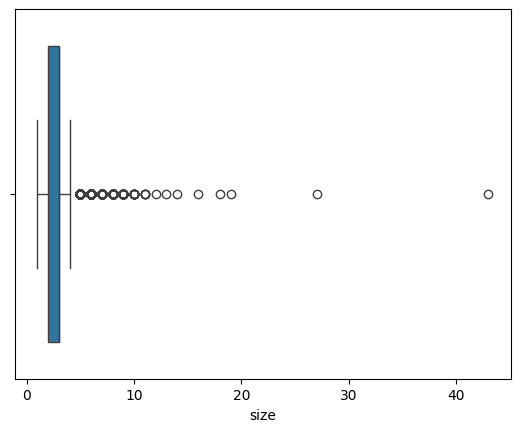

In [76]:
sns.boxplot(x=df['size'])

In [77]:
df.loc[:,'total_sqft'].sample(n=10)

1325     2000
6002     1410
1669     1200
3908     1392
622      1445
3529     1140
11447    1151
4498     2503
875      1652
4437     1680
Name: total_sqft, dtype: object

In [78]:
df['location'].fillna('Whitefield')

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [79]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [80]:
df.drop(['area_type','availability'],axis=1,inplace=True)

In [81]:
def isfloat(valueStr):
  try:
    float(valueStr)
  except:
    return False
  return True


In [82]:
df[~df['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,balcony,price
30,Yelahanka,4.0,2100 - 2850,4.0,0.0,186.000
56,Devanahalli,4.0,3010 - 3410,NaN,NaN,192.000
81,Hennur Road,4.0,2957 - 3450,NaN,NaN,224.500
122,Hebbal,4.0,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2.0,1042 - 1105,2.0,0.0,54.005
165,Sarjapur,2.0,1145 - 1340,2.0,0.0,43.490
188,KR Puram,2.0,1015 - 1540,2.0,0.0,56.800
224,Devanahalli,3.0,1520 - 1740,NaN,NaN,74.820
410,Kengeri,1.0,34.46Sq. Meter,1.0,0.0,18.500
549,Hennur Road,2.0,1195 - 1440,2.0,0.0,63.770


In [83]:
def CleanTotal_sqft(data):
  token=data.split('-')
  if len(token)==2:
    return (float(token[0])+float(token[1]))/2
  try:
    return float(data)
  except:
    return None


In [84]:
df['total_sqft']=df['total_sqft'].apply(CleanTotal_sqft)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13320 non-null  float64
 2   total_sqft  13274 non-null  float64
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(5), object(1)
memory usage: 624.5+ KB


In [86]:
df.dropna(inplace=True)

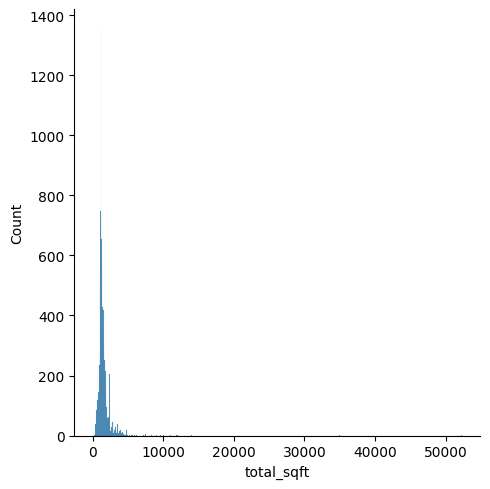

In [87]:
sns.displot(df['total_sqft'])

In [88]:
location_count=df['location'].value_counts()

In [89]:
location_count['Electronic City']

300

In [90]:
location_count[df['location']]>10

Electronic City Phase II    True
Chikka Tirupathi            True
Uttarahalli                 True
Lingadheeranahalli          True
Kothanur                    True
                            ... 
Green Glen Layout           True
Whitefield                  True
Raja Rajeshwari Nagar       True
Padmanabhanagar             True
Doddathoguru                True
Name: location, Length: 12668, dtype: bool

In [91]:
location_count

Whitefield           513
Sarjapur  Road       372
Electronic City      300
Kanakpura Road       259
Thanisandra          230
                    ... 
S R Layout             1
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Abshot Layout          1
Name: location, Length: 1259, dtype: int64

In [92]:
df['location']=df['location'].apply(lambda x:'other' if location_count[x]<=10 else x )

In [93]:
df['location'].value_counts()

other                 2756
Whitefield             513
Sarjapur  Road         372
Electronic City        300
Kanakpura Road         259
                      ... 
Pattandur Agrahara      11
Nagasandra              11
Mico Layout             11
Banjara Layout          11
LB Shastri Nagar        11
Name: location, Length: 236, dtype: int64

<Axes: ylabel='total_sqft'>

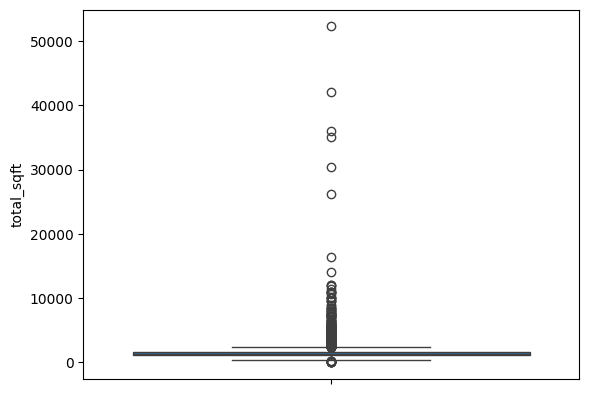

In [94]:
sns.boxplot(df['total_sqft'])

In [95]:
price_per_sqft=(df['price']/df['total_sqft']*100)

In [96]:
price_per_sqft.describe()

count    12668.000000
mean         6.876277
std         22.633543
min          0.267830
25%          4.242721
50%          5.376344
75%          7.142857
max       2300.000000
dtype: float64

In [97]:
price_per_sqft

0         3.699811
1         4.615385
2         4.305556
3         6.245891
4         4.250000
           ...    
13314     6.530612
13315     6.689835
13317     5.258545
13318    10.407336
13319     3.090909
Length: 12668, dtype: float64

In [98]:
q1=price_per_sqft.quantile(0.25)
q3=price_per_sqft.quantile(0.75)

In [99]:
iqr=q3-q1

In [100]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [101]:
df=df[(price_per_sqft<=upper_limit) & (price_per_sqft>=lower_limit)]

<Axes: ylabel='price'>

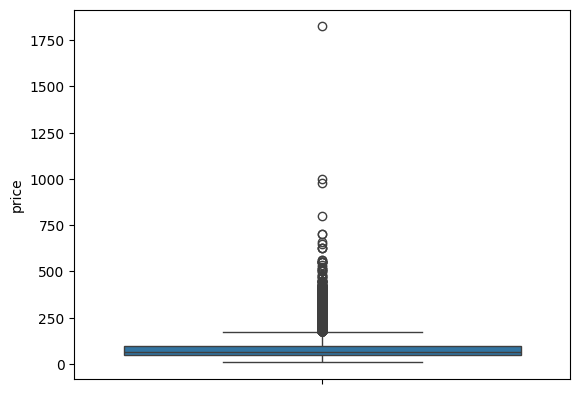

In [102]:
sns.boxplot(df['price'])

In [103]:
filtered_df=df[df['bath']<10]

In [104]:
df['location'].value_counts()

other                   2251
Whitefield               490
Sarjapur  Road           360
Electronic City          298
Kanakpura Road           258
                        ... 
Mahalakshmi Layout         6
1st Block Jayanagar        5
Benson Town                5
Giri Nagar                 2
2nd Stage Nagarbhavi       2
Name: location, Length: 235, dtype: int64

**Train test split**

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
df.sample(n=6)

,location,size,total_sqft,bath,balcony,price
11374,Kaval Byrasandra,3.0,2700.0,3.0,2.0,200.0
2732,Hennur,2.0,1285.0,2.0,1.0,60.0
9763,other,2.0,998.0,2.0,2.0,65.0
11679,other,2.0,1180.0,2.0,2.0,65.0
10160,Ramagondanahalli,3.0,2040.0,3.0,2.0,114.0
12977,KR Puram,7.0,2800.0,6.0,1.0,110.0


In [107]:
X,y=df.drop(['price','balcony'],axis=1),df['price']

In [108]:
dummies=pd.get_dummies(X['location'])

In [109]:
dummies.head(5)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
dummies.shape

(11479, 235)

In [111]:
X=pd.concat([X.drop('location',axis=1),dummies],axis='columns')

In [112]:
X.head(1)

,size,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2.0,1056.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Build Model**

In [113]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [114]:
X.rename(columns={'size':'BHK'},inplace=True)

In [115]:
cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.55305089, 0.47389971, 0.52073351, 0.59972884, 0.5645121 ])

In [116]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
  algo={
      'linear_regression':{
          'model':LinearRegression(),
          'params':{
                   'n_jobs': [0,1,2],
                   'positive':[True,False]
          }
      },
      'ridge':{
          'model':Lasso(),
          'params':{
              'alpha': [1,2],
              'selection': ['random', 'cyclic']
          }
      },
      'decision_Tree':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion':['friedman_mse'],
              'splitter': ['best','random']
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algo.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
  print(scores)
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [117]:
find_best_model(X,y)

[{'model': 'linear_regression', 'best_score': 0.5823107976152648, 'best_params': {'n_jobs': 0, 'positive': True}}, {'model': 'ridge', 'best_score': 0.5422160458861814, 'best_params': {'alpha': 2, 'selection': 'random'}}, {'model': 'decision_Tree', 'best_score': 0.6487488794709015, 'best_params': {'criterion': 'friedman_mse', 'splitter': 'best'}}]


,model,best_score,best_params
0,linear_regression,0.582311,"{'n_jobs': 0, 'positive': True}"
1,ridge,0.542216,"{'alpha': 2, 'selection': 'random'}"
2,decision_Tree,0.648749,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [118]:
X.head()

,BHK,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2.0,1056.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2600.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [132]:
regressor = DecisionTreeRegressor(random_state=0)
#cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#arr=cross_val_score(regressor, X, y, cv=cv)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [143]:
def prediction(BHK,total_sqft,bath,location):
  arr=np.where(X.columns==location,1,0)
  arr[0]=BHK
  arr[1]=total_sqft
  arr[2]=bath
  y_pre=regressor.predict(arr.reshape(1,-1))
  return y_pre[0]


In [144]:
prediction(2.0,1056.0,2.0,'1st Phase JP Nagar')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


93.0